# Covid 19 Cases: Development of Covid Outbreak China vs. America

## Overview

In this project the worldwide outbreak of the Corona-Virus will be analysed. In this context, several different project goals are defined, which will require the planning of appropriate actions to be fullfilled. Afterwards the neccessary data must be obtained and explored in order to finalize the project analysis. Finally the most important findings will be summarized.

## Project Goals

- General **exploratory data analysis**
    - Find key patterns, relations, developments, contrasts in the data, stats
    - Which province had most deaths, most recoveries, most cases etc. (per capita)
- **Analyse outbreak over time** in different provinces
- **Analyse outbreak geographically** 
- Visualise the key findings 
- **Conclusion** as to how the outbreak was handled by the different countries


## Actions

1. Find relevant and adequate Data from data.gov, kaggle, data.world, awesomedata, Fivethirtyeight, Buzzfeed, UCI, Data is Plural
2. Load and check the data
3. Determine what kind of analysis is needed/appropriate
4. Data wrangling and tidying
5. Explore and Describe the Data
6. Use Tableu to visualize key findings
7. Summarize the key finding and come to a conclusion










## Data

#### 1. Find relevant and adequate Data

Through www.kaggle.com four relevant datasets were identified.
The datasets will be included in the depository. 

#### 2. Load and check the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn-dark')

Summary dataset: covid

In [2]:
covid = pd.read_csv('covid_19_data.csv')
covid.head(10)
#print(covid.describe())
#print(covid.count())
#print(covid.dtypes)
#print(covid.columns)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


Summary dataset: covid_confirmed

In [3]:
confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
confirmed.head()
#print(confirmed.describe())
#print(confirmed.count())
#print(confirmed.dtypes)
#print(confirmed.columns)    
# 1 Unkown province in china. Relative small values. Could just ignore this missing value. 
# Repatriated Travellers in Canada also no location because they dont inhibit distinct location

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0.0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0.0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0.0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0.0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0.0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


Summary dataset: covid_death

In [4]:
death = pd.read_csv('time_series_covid_19_deaths.csv')
death.head(10)
#print(death.describe())
#print(death.count())
#print(death.dtypes)
#print(death.columns)    
# 1 Unkown province in china. Relative small values. Could just ignore this missing value. 
# Repatriated Travellers in Canada also no location because they dont inhibit distinct location

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,72699,73391,73688,74063,74480,75056,75588,76135,76693,77108
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,4364,4371,4386,4392,4394,4400,4411,4416,4423,4428
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54


#### 3. Determine what kind of analysis is needed/appropriate

a) Exploratory Data Analysis (Python)

b) Time Series Analysis (Python)

c) Visualization and geographical Developmentof Outbreak (Tableu)

d) Conclusion: Statistical/mathmatical calculations (e.g. Relation between population and rate of outbreak)
  

#### 4. Data wrangling and tidying

- Preadjusting everything that is possible in the csv file (correct format of ObservationDate)
- No missing data in the columns except for Province/State (not every country was drilled down into states/provinces)
- Making columns more intuitive and readable
- Adress missing Values/ find reasoning 

In [5]:
covid = covid.drop(['Last Update','SNo'], axis = 1)
covid = covid.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country'})
confirmed = confirmed.rename(columns={'Country/Region': 'Country', 'Province/State': 'Province'})
death = death.rename(columns={'Country/Region': 'Country', 'Province/State': 'Province'})
# df = df[df.Lat.notnull()] --> to clear unknown locations for geographical calculations

## Analysis

#### 5. Explore and Describe the Data

- Amount of confirmed cases per province (barchart)
- Amount of deaths per Province (barchart)
- Amount of recoveries per Province (barchart)
- Statistically compare these cases to one another (e.g. deaths in relation to cases) 
    Which results are most interesting, highest ratios, etc.
- Statistically Compare Cases to inhabitants living in these countries (Add Columns or make new dataframe) 
- Time Series comparison of the biggest countries. China, US 


### China

In [6]:
provinces = confirmed[confirmed['Country']=='China']['Province']
china_confirmed = confirmed[confirmed['Country']=='China']['5/29/21']
china_death = death[death['Country']=='China']['5/29/21']
china = pd.DataFrame(list(zip(provinces, china_confirmed, china_death)),
               columns =['Provinces', 'Cases', 'Deaths'])
china['Deaths per Case on %'] = (china['Deaths']/china['Cases'])*100
china = china.sort_values('Cases',ascending=False)
china.head()

,Provinces,Cases,Deaths,Deaths per Case on %
13,Hubei,68159,4512,6.619815
12,Hong Kong,11837,210,1.774098
5,Guangdong,2432,8,0.328947
25,Shanghai,2093,7,0.334448
10,Heilongjiang,1612,13,0.806452


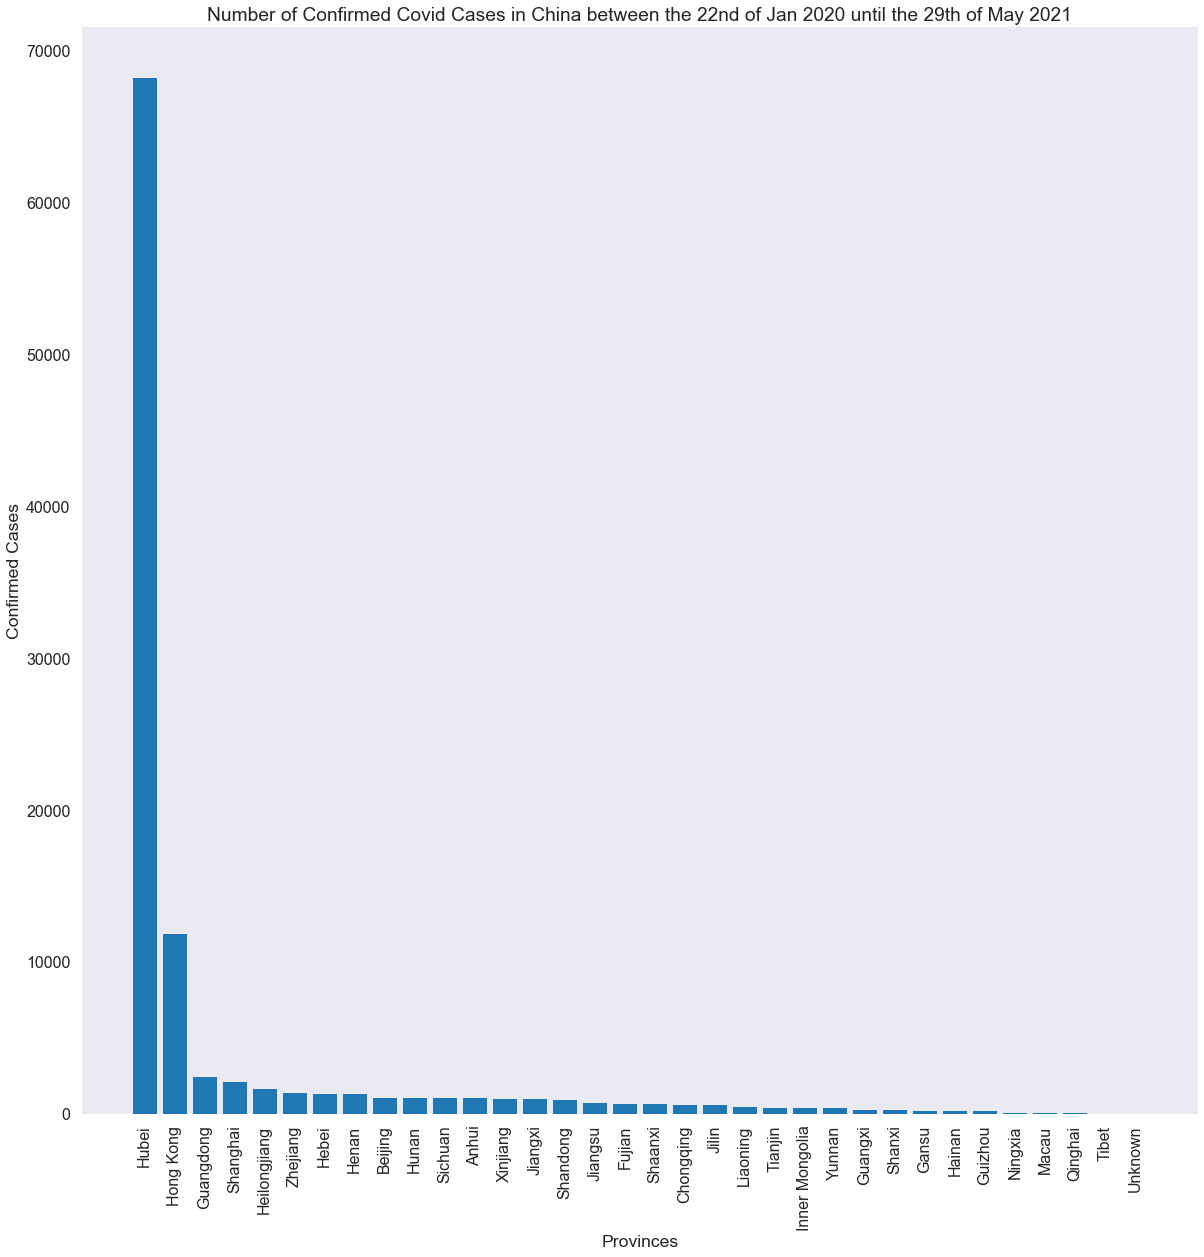

<Figure size 921.6x633.6 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(china.Provinces, china.Cases)
ax.set_xticks(range(len(china.Provinces)))
ax.set_xticklabels(china.Provinces,rotation=90)
plt.title("Number of Confirmed Covid Cases in China between the 22nd of Jan 2020 until the 29th of May 2021")
plt.xlabel('Provinces')
plt.ylabel('Confirmed Cases')
plt.show()
plt.show()
plt.clf()

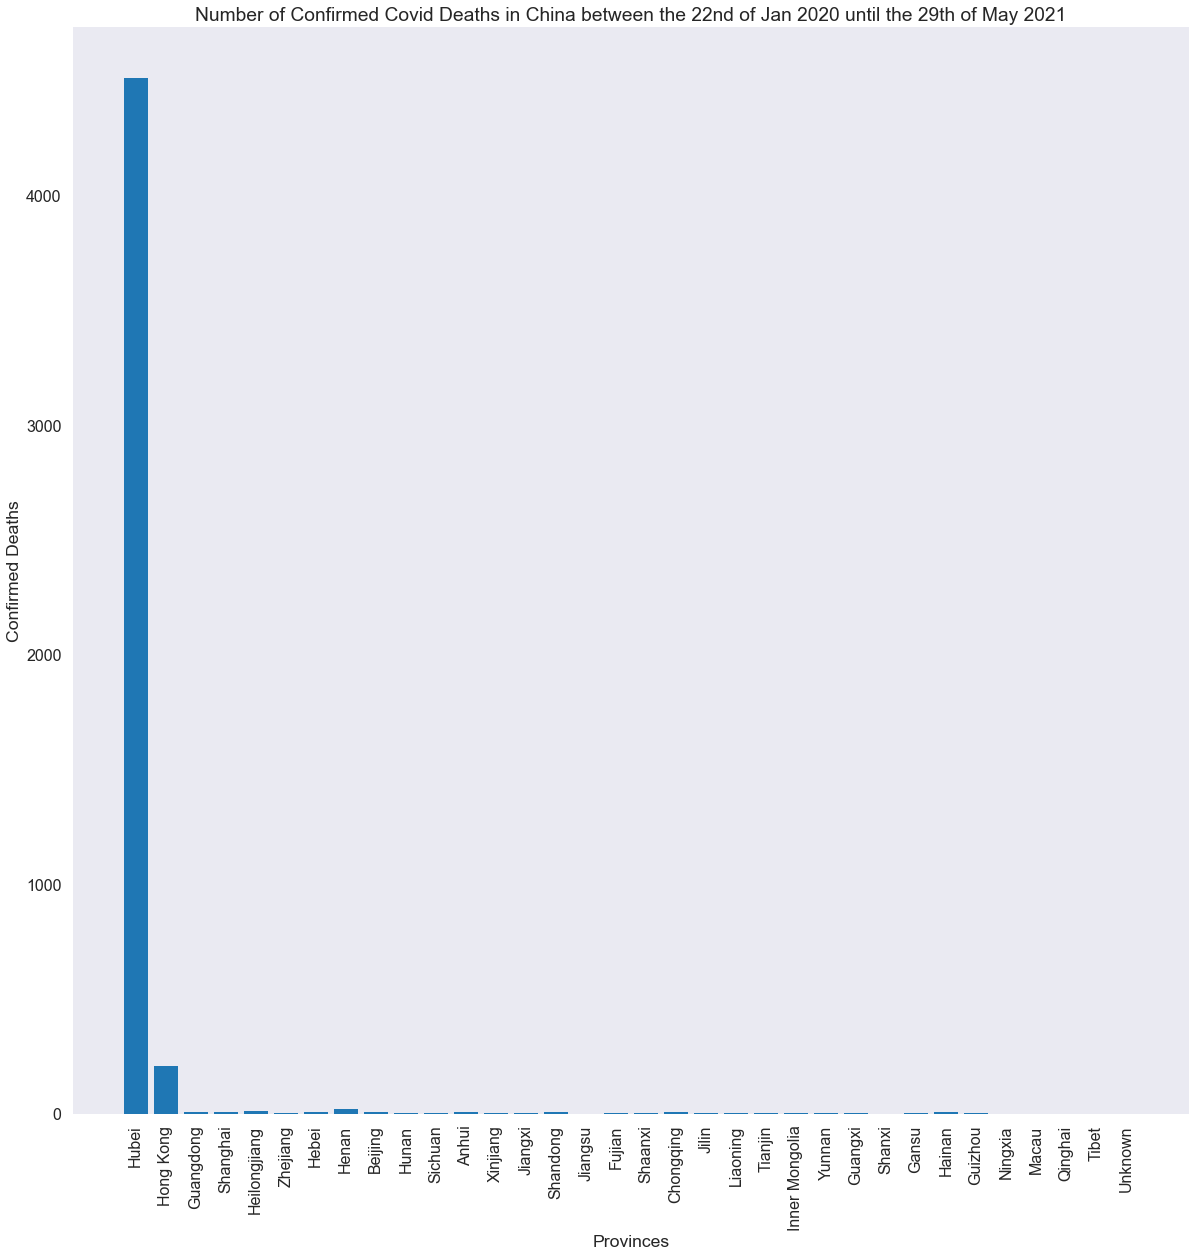

<Figure size 921.6x633.6 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(china.Provinces, china.Deaths)
ax.set_xticks(range(len(china.Provinces)))
ax.set_xticklabels(china.Provinces,rotation=90)
plt.title("Number of Confirmed Covid Deaths in China between the 22nd of Jan 2020 until the 29th of May 2021")
plt.xlabel('Provinces')
plt.ylabel('Confirmed Deaths')
plt.show()
plt.show()
plt.clf()

## US

In [9]:
us_confirmed = pd.read_csv('time_series_covid_19_confirmed_US.csv')
us_confirmed.head()
#print(us_confirmed.describe())
#print(us_confirmed.count())
#print(us_confirmed.dtypes)
#print(us_confirmed.columns)    

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864


In [10]:
us_deaths = pd.read_csv('time_series_covid_19_deaths_US.csv')
us_deaths.head()
#print(us_deaths.describe())
#print(us_deaths.count())
#print(us_deaths.dtypes)
#print(us_deaths.columns)    

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,109,109,110,110,110,110,110,110,110,110
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,310,310,310,310,310,310,310,310,311,311
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,58,58,58,58,58,58,58,58,59,59
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,139,139,139,139,139,139,139,139,139,139


In [11]:
us_con_df = pd.DataFrame(us_confirmed['Province_State'].unique())
us_con_df.columns = ['States']
us_con_df['Cases'] = us_con_df['States'].apply(lambda x:  us_confirmed.loc[us_confirmed['Province_State'] == x, '5/29/21'].sum() )
us_con_df['Deaths'] = us_con_df['States'].apply(lambda x:  us_deaths.loc[us_deaths['Province_State'] == x, '5/29/21'].sum() )
us_con_df['Deaths per Case in %'] = (us_con_df['Deaths']/us_con_df['Cases'])*100
us_con_df = us_con_df.sort_values('Cases',ascending=False)
us_con_df.head()

,States,Cases,Deaths,Deaths per Case in %
5,California,3788713,63236,1.669063
49,Texas,2952861,51491,1.743766
11,Florida,2320818,36774,1.584528
36,New York,2101055,53269,2.535345
17,Illinois,1380978,25166,1.822332


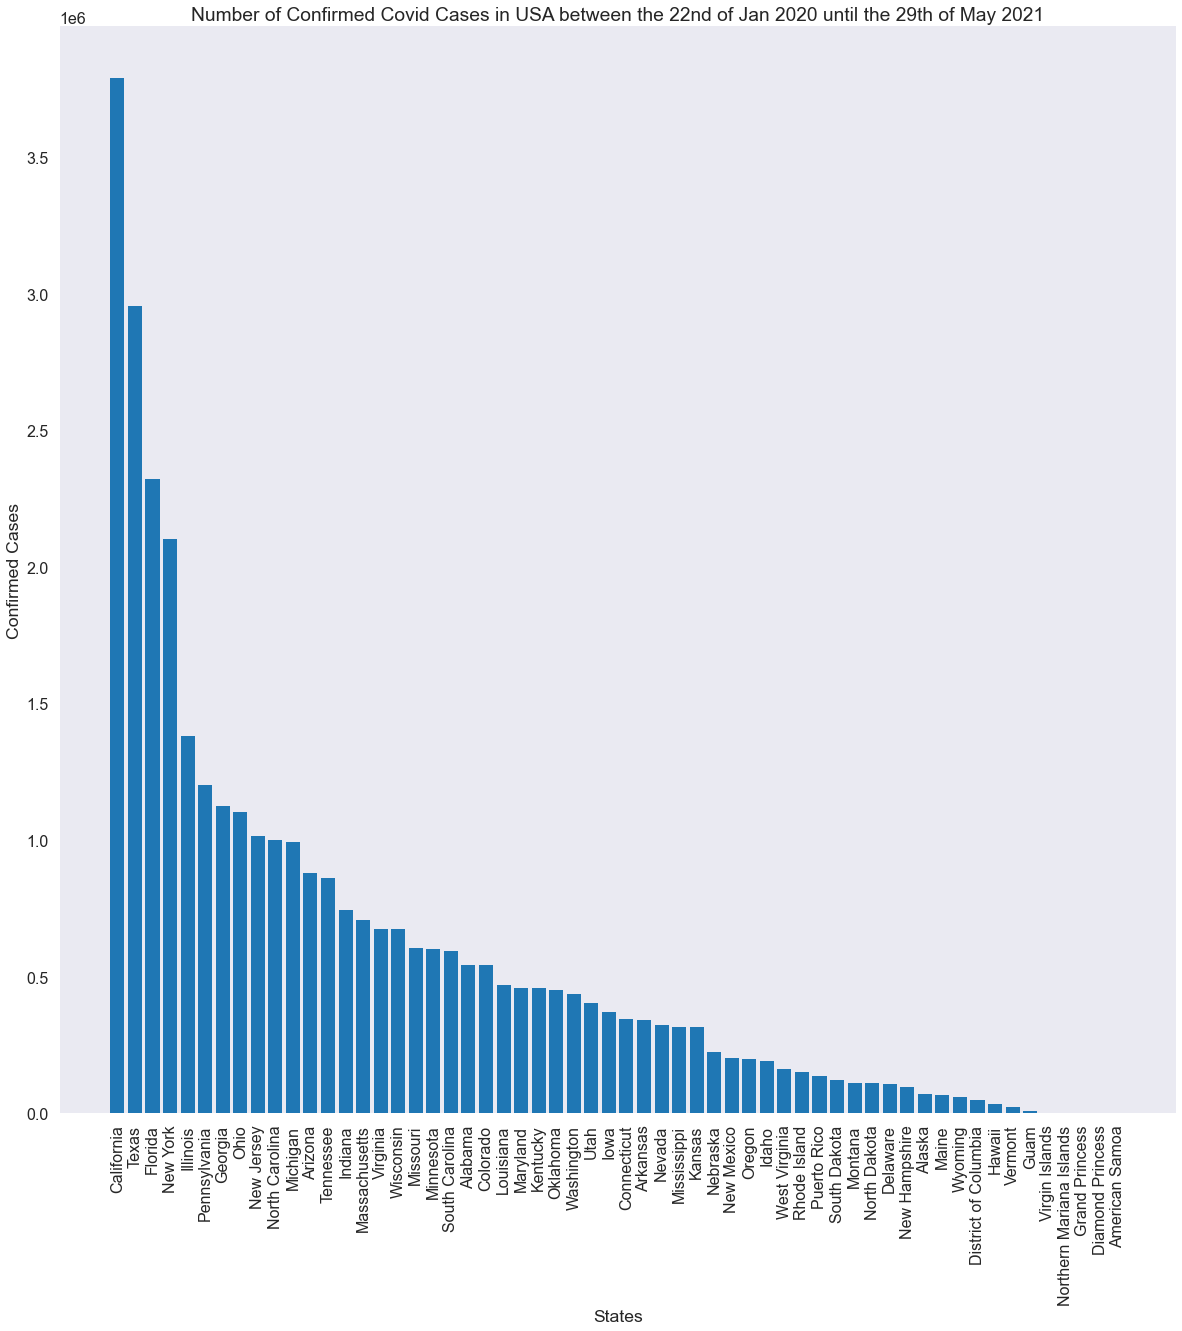

<Figure size 921.6x633.6 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(us_con_df.States, us_con_df.Cases)
ax.set_xticks(range(len(us_con_df.States)))
ax.set_xticklabels(us_con_df.States,rotation=90)
plt.title("Number of Confirmed Covid Cases in USA between the 22nd of Jan 2020 until the 29th of May 2021")
plt.xlabel('States')
plt.ylabel('Confirmed Cases')
plt.show()
plt.show()
plt.clf()

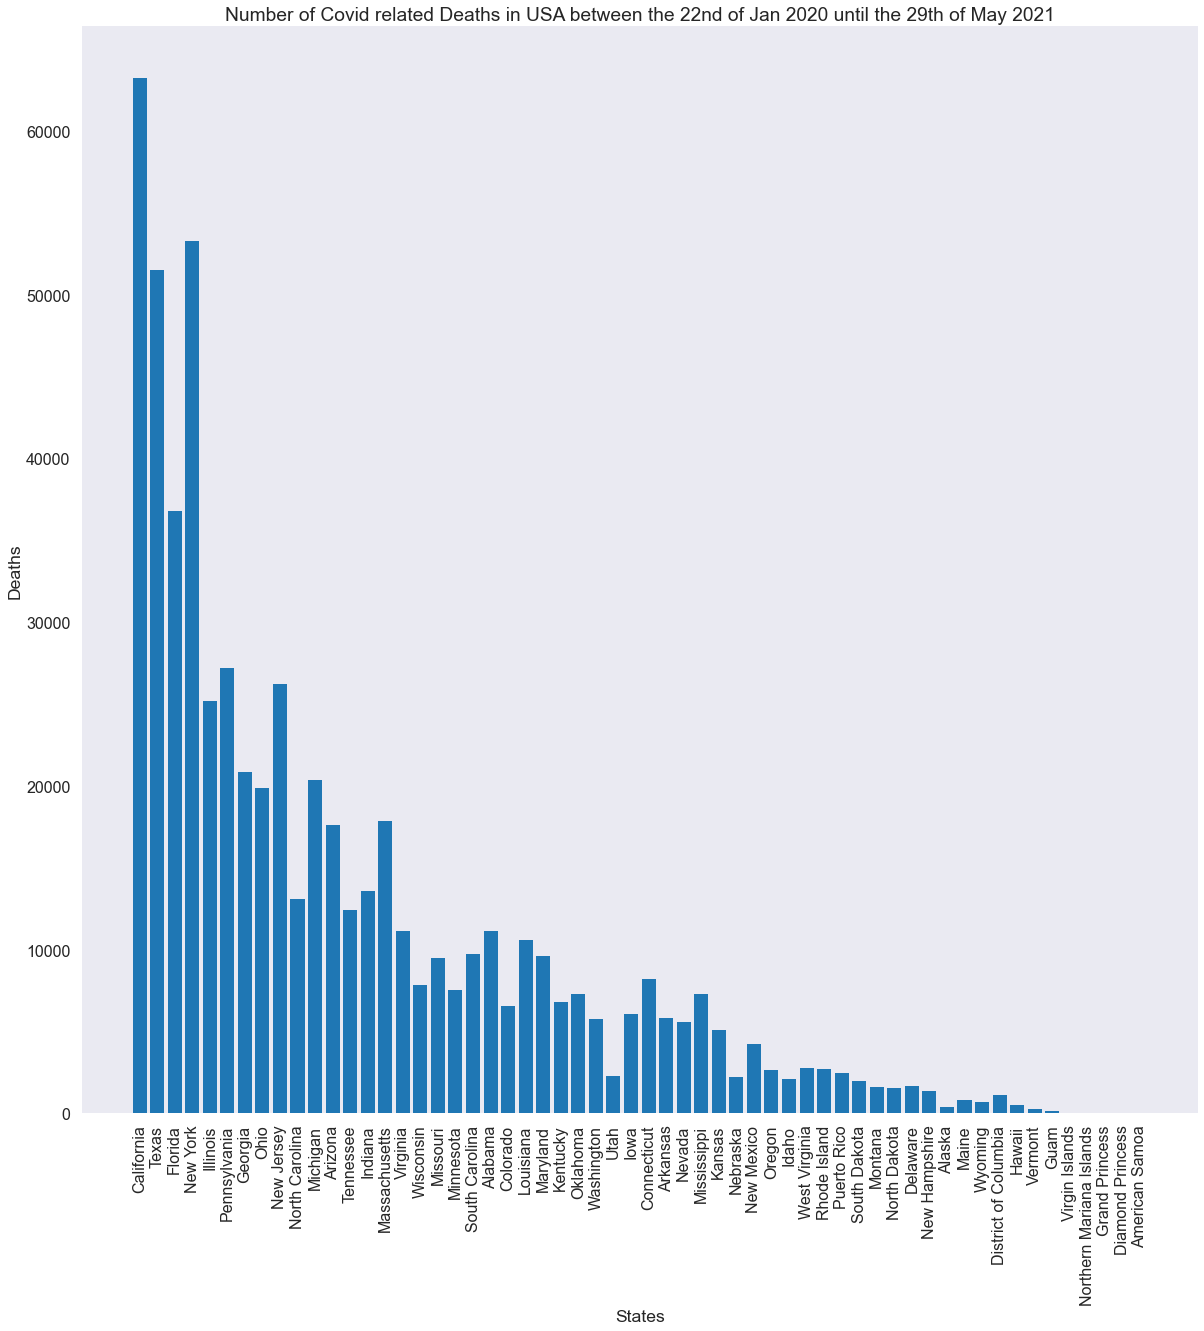

<Figure size 921.6x633.6 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(us_con_df.States, us_con_df.Deaths)
ax.set_xticks(range(len(us_con_df.States)))
ax.set_xticklabels(us_con_df.States,rotation=90)
plt.title("Number of Covid related Deaths in USA between the 22nd of Jan 2020 until the 29th of May 2021")
plt.xlabel('States')
plt.ylabel('Deaths')
plt.show()
plt.show()
plt.clf()

## Time Series Analysis comparison:

In [14]:
index_us = confirmed[confirmed['Country'] == 'US'].index
index_us
us_time_list = confirmed.loc[index_us, :].values.flatten().tolist()
us_time_list= us_time_list[4:]
time_series_df = pd.DataFrame(us_time_list)
time_series_df.columns = ['US']
time_series_df

,US
0,1.0
1,1.0
2,2.0
3,2.0
4,5.0
...,...
489,33166418.0
490,33190470.0
491,33217995.0
492,33239963.0


In [15]:
china_time_df = confirmed[confirmed['Country']=='China']
china_time_list = china_time_df.sum()
china_time_list = list(china_time_list[4:])
time_series_df['China'] = china_time_list
time_series_df['Date'] = pd.date_range(start='1/22/2020', periods=len(time_series_df), freq='D')
time_series_df

,US,China,Date
0,1.0,548.0,2020-01-22
1,1.0,643.0,2020-01-23
2,2.0,920.0,2020-01-24
3,2.0,1406.0,2020-01-25
4,5.0,2075.0,2020-01-26
...,...,...,...
489,33166418.0,102905.0,2021-05-25
490,33190470.0,102925.0,2021-05-26
491,33217995.0,102932.0,2021-05-27
492,33239963.0,102948.0,2021-05-28


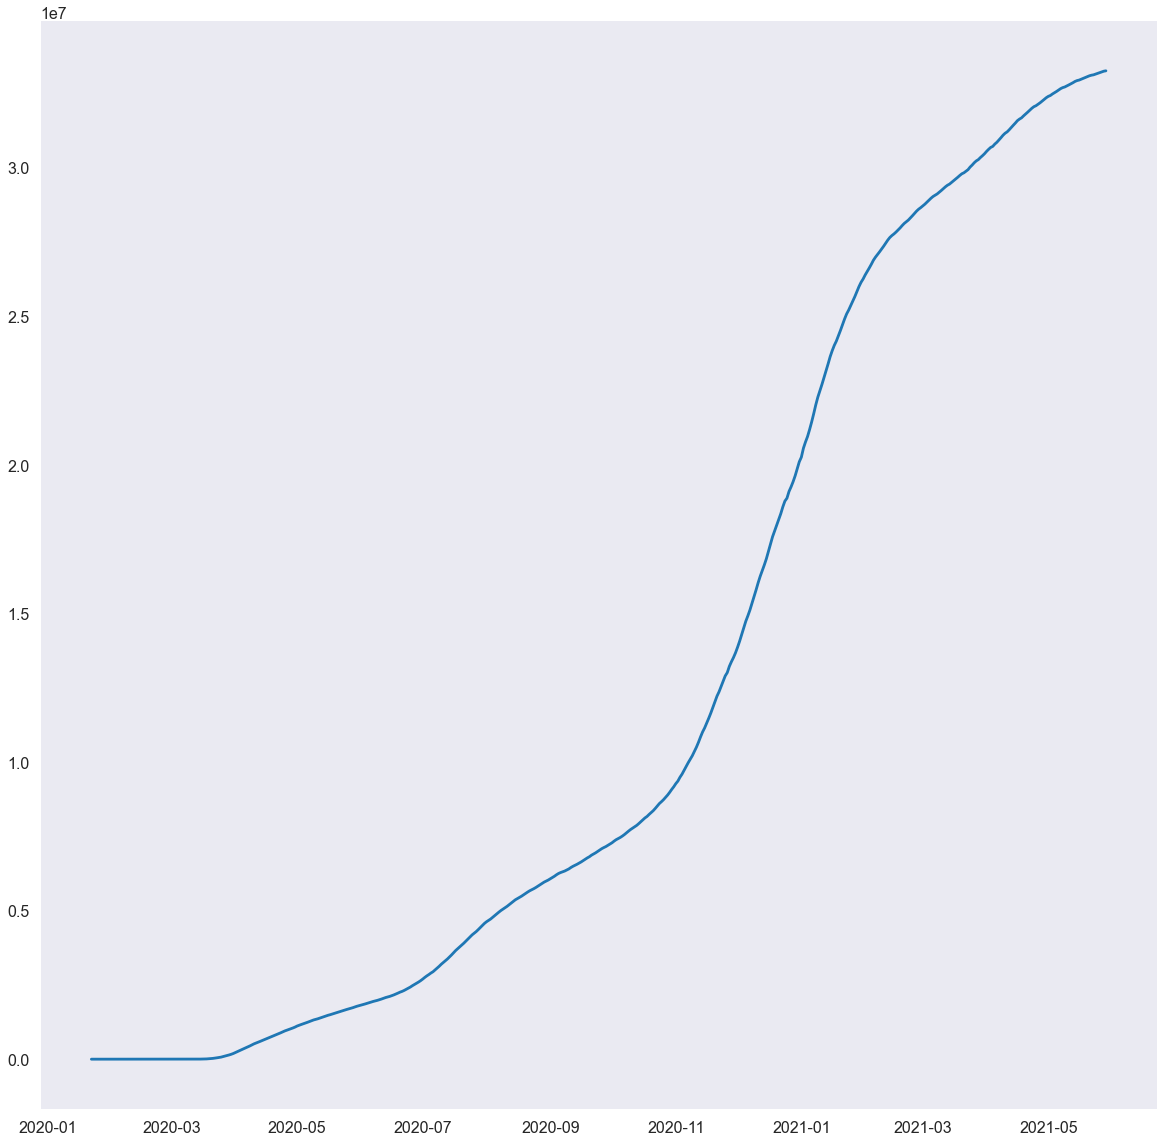

<Figure size 921.6x633.6 with 0 Axes>

In [16]:
plt.figure(figsize=(20,20))
plt.plot(time_series_df.Date, time_series_df.US)
plt.show()
plt.clf()

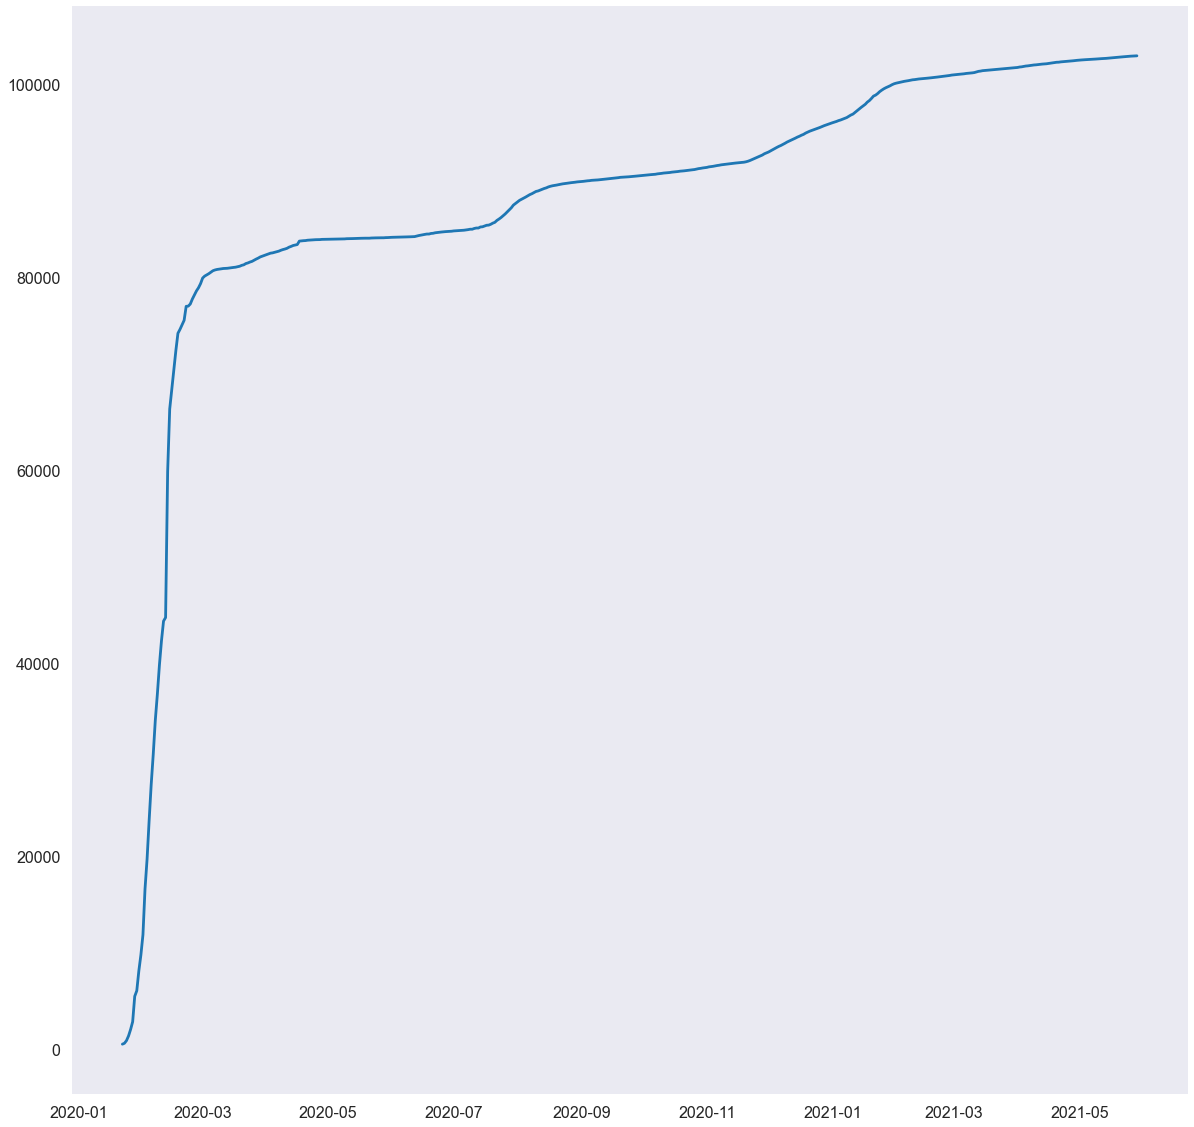

<Figure size 921.6x633.6 with 0 Axes>

In [17]:
plt.figure(figsize=(20,20))
plt.plot(time_series_df.Date, time_series_df.China)
plt.show()
plt.clf()

#### 6. Use Tableu to visualize key findings

US: https://public.tableau.com/views/USCovid-19Development/US?:language=de-DE&:display_count=n&:origin=viz_share_link

China: https://public.tableau.com/views/ChinaCovid-19Development/China?:language=de-DE&:display_count=n&:origin=viz_share_link

## Conclusion

#### 7. Summarize key findings and come to a conclusion

China and the United States took vastly different approaches in order to tackle the outbreak of the Corona Virus, which is clearly visible in the data. China following the Zero-Covid-Policy implemented strict no-contact rules and thereby contain the spread of the virus rather quickly. Therefore there is a huge discrepency between Hubei, where the Virus is believed to have originated and the other provinces. The Virus first having been tested in Hubei also is the reason for the steep increase in cases, followed by a quick flattening of the curve due to the strick restricktions of the government. 

THe United States on the other hand undertook much more linient containment measures and the population was not as ready as many Asian Countries, who have been affected by SARS in the past. This resulted in an outbreak on a much larger scale with is demonstrated in the data. It is also clear to see, that that the confirmed Cases and mortalities were still steadily rising until May 2021. The cases were also widespread through all the states, opposed to CHina, were most cases were contained in the province of outbreak. 

The geographical visualizations can bee seen in Tableu. 